In [1]:
import copy
import glob
import gzip
import json
import os
import shutil
import sys
import time
import warnings
import zipfile
from datetime import date

import cdsapi
import h5py
import numpy
import numpy as np
import pandas as pd
import urllib3
import xarray as xr

sys.path.append(os.getcwd() + "/../cds-backend/code/")
import cds_eua4 as eua

warnings.filterwarnings("ignore")

sys.path.insert(0, os.getcwd() + "/../resort/rasotools-master/")
import matplotlib
import matplotlib.font_manager as font_manager
import matplotlib.pylab as plt
import matplotlib.pyplot as maplt
import rasotools
import seaborn

matplotlib.rcParams.update({"font.size": 20})
matplotlib.rcParams["figure.figsize"] = (20, 10)
font = {
    # "family": "normal",
    # 'weight' : 'bold',
    "size": 22,
}
matplotlib.rc("font", **font)

no config found


request took:  62.47879934310913  seconds


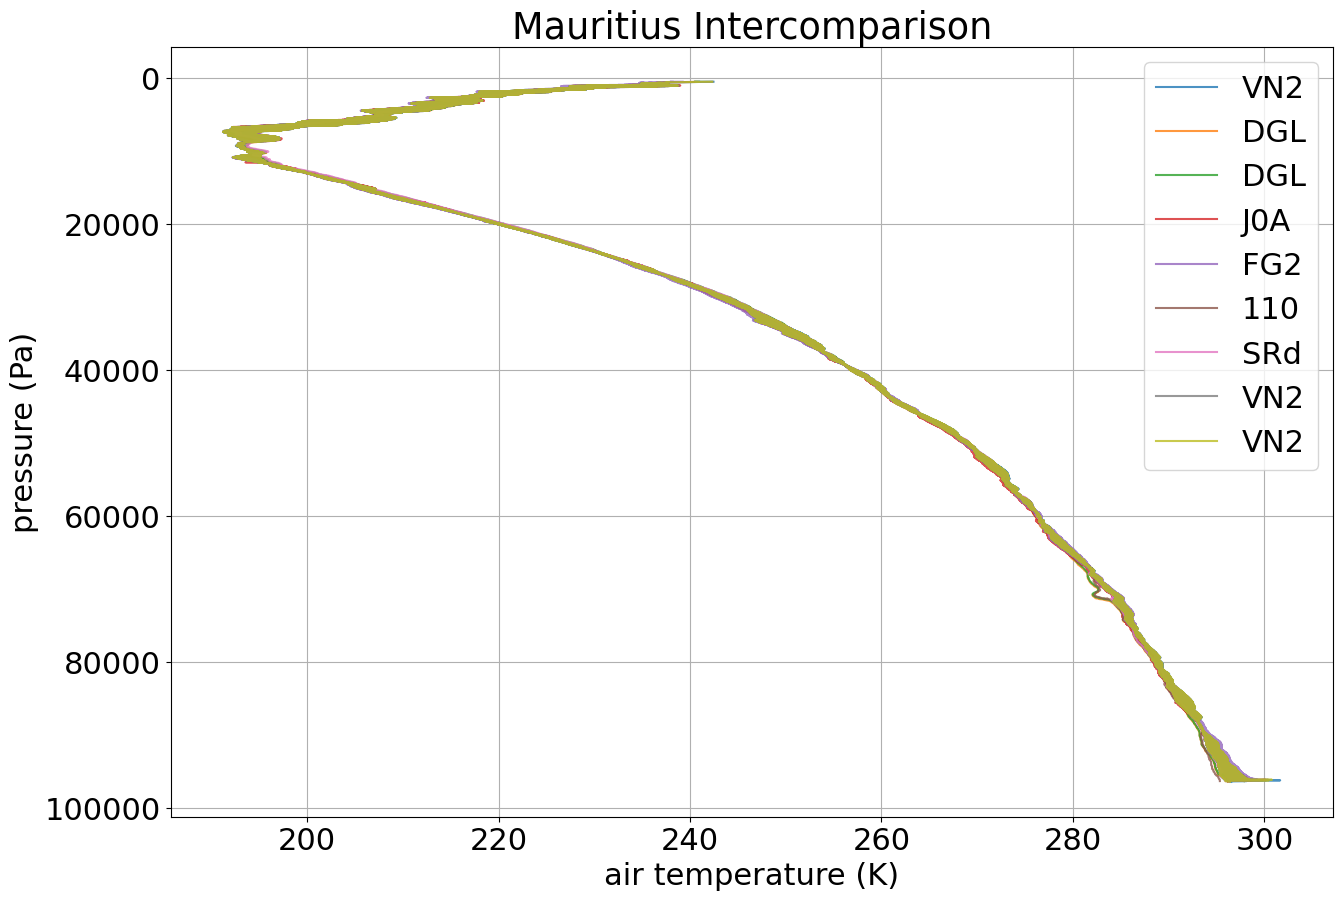

In [2]:
rq = {
    "statid": ['0-20100-0-019*'],
    "variable": ["air_temperature"],
    "optional": ['sonde_type'],
}
df_v14 = eua.vm_request_wrapper(rq, overwrite=True)
fig, ax1 = maplt.subplots(1, 1, figsize = (15,10))
for i in df_v14:
    df = df_v14[i].to_dataframe()
    df_p = df[df.time.dt.day == 7]
    df_p.sort_values(by='plev', inplace = True)
    if len(df_p) > 0:
        # print(df_p.sonde_type.iloc[0])
        ax1.plot(df_p.ta, df_p.plev, alpha = 0.8, label=df_p.sonde_type.iloc[0])
ax1.set_ylabel('pressure (Pa)')
ax1.set_xlabel('air temperature (K)')
ax1.legend()
ax1.grid()
maplt.title('Mauritius Intercomparison')
maplt.gca().invert_yaxis()
maplt.show()
maplt.close()

request took:  31.29113245010376  seconds


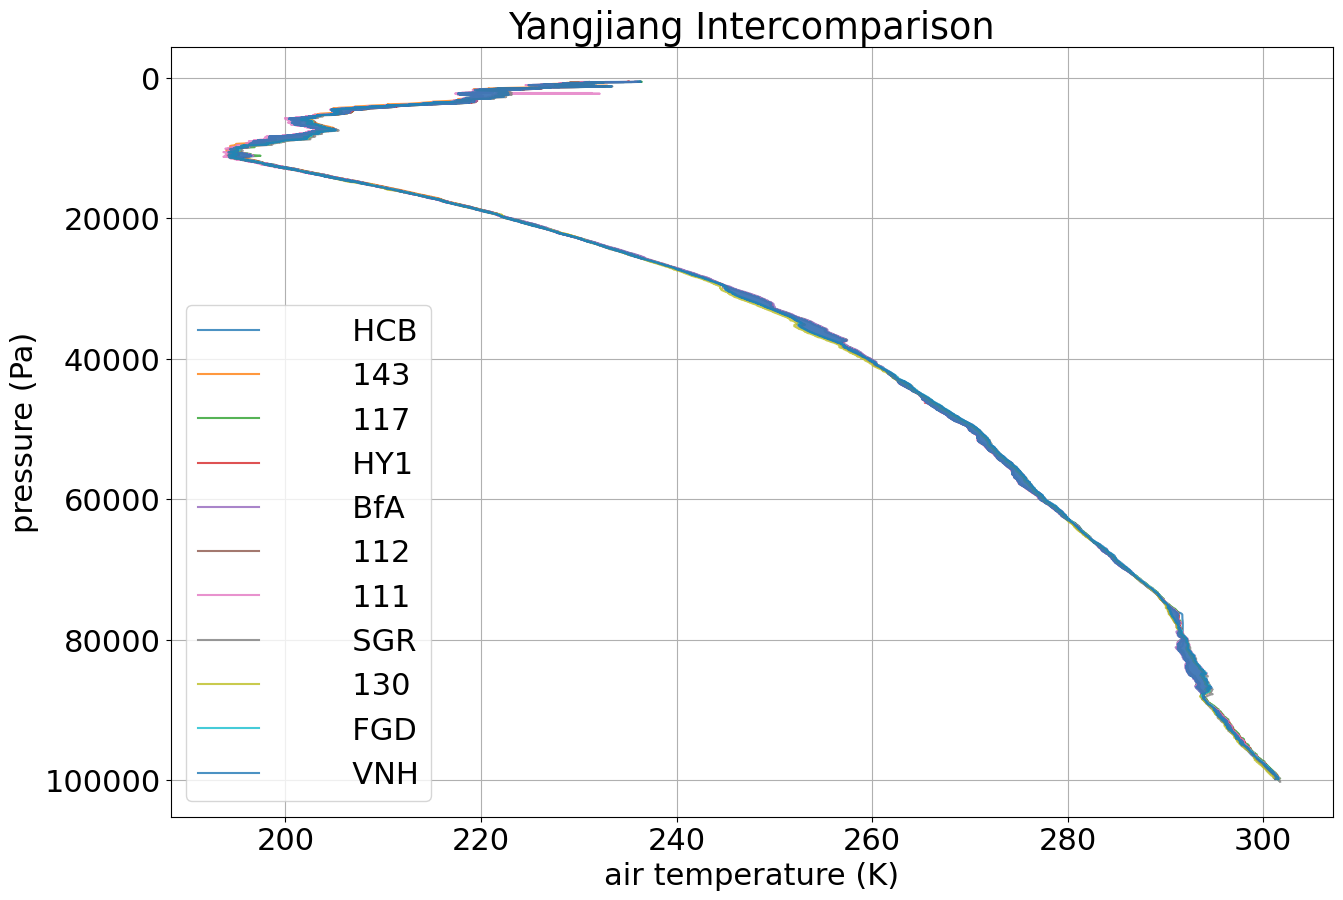

In [3]:
rq = {
    "statid": ['0-20100-0-020*'],
    "variable": ["air_temperature"],
    "optional": ['sonde_type'],
}
df_v14 = eua.vm_request_wrapper(rq, overwrite=True)
fig, ax1 = maplt.subplots(1, 1, figsize = (15,10))
for i in df_v14:
    df = df_v14[i].to_dataframe()
    df_p = df[df.time.dt.day == 8]
    df_p.sort_values(by='plev', inplace = True)
    if len(df_p) > 0:
        # print(df_p.sonde_type.iloc[0])
        ax1.plot(df_p.ta, df_p.plev, alpha = 0.8, label=df_p.sonde_type.iloc[0])
ax1.set_ylabel('pressure (Pa)')
ax1.set_xlabel('air temperature (K)')
ax1.legend()
ax1.grid()
maplt.title('Yangjiang Intercomparison')
maplt.gca().invert_yaxis()
maplt.show()
maplt.close()